# Testing a modded LAMMPS: `fix mol/swap`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names_2 = ['Step', 'KinEng', 'PotEng', 'TotEng', 'E_pair', 'E_bond', 'Temp',
       'Press', 'Density', 'Lx', 'Volume', 'Bonds', 'c_count[1]', 'c_count[2]',
       'c_btypes[1]', 'c_btypes[2]', 'c_btypes[3]']
names_4 = ['Step', 'KinEng', 'PotEng', 'TotEng', 'E_pair', 'E_bond', 'Temp',
       'Press', 'Density', 'Lx', 'Volume', 'Bonds', 'c_count[1]', 'c_count[2]',
           'c_count[3]', 'c_count[4]',
       'c_btypes[1]', 'c_btypes[2]', 'c_btypes[3]']

# First, test out the semi-grand run for both cases

Type distribution of the 2-type system:

In [3]:
t2 = pd.read_csv("FMS_test/2_types/n8k.dat", delim_whitespace=True, names = names_2, comment = '#')

In [4]:
t4 = pd.read_csv("FMS_test/4_types/n8k.dat", delim_whitespace=True, names = names_4, comment = '#')

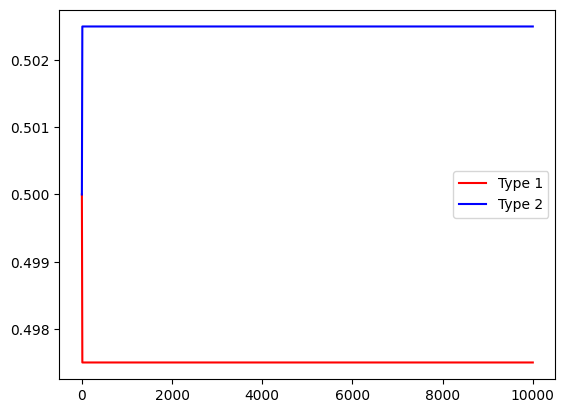

In [5]:
plt.plot(t2.Step, t2['c_count[1]'], c = 'r', label = 'Type 1')
plt.plot(t2.Step, t2['c_count[2]'], c = 'b', label = 'Type 2')
plt.legend()

Now we compare the type distribution to the 4-type system:

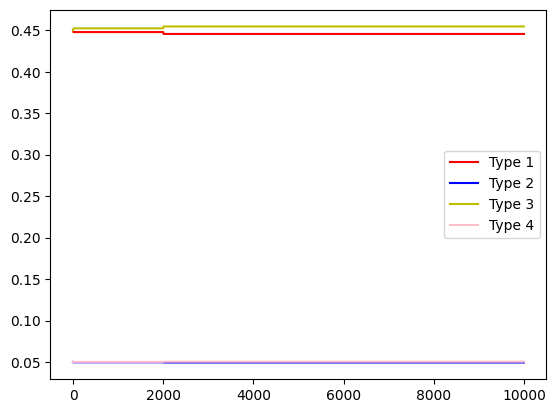

In [6]:
plt.plot(t4.Step, t4['c_count[1]'], c = 'r', label = 'Type 1')
plt.plot(t4.Step, t4['c_count[2]'], c = 'b', label = 'Type 2')
plt.plot(t4.Step, t4['c_count[3]'], c = 'y', label = 'Type 3')
plt.plot(t4.Step, t4['c_count[4]'], c = 'pink', label = 'Type 4')
plt.legend()

### Ideally we should find that the 2-type system and the 4-type system behave the same way

so re-plot the above with type 1+2 and 3+4 combined:

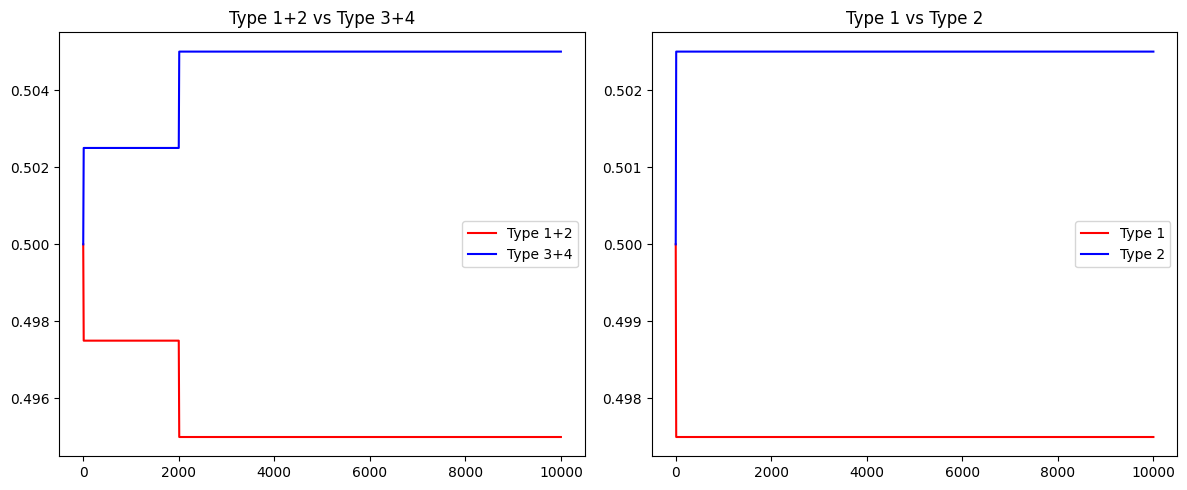

In [7]:

# Set the figure size
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the width and height as needed

# Side-by-side subplots for Type 1+2 and Type 3+4
axs[0].plot(t4.Step, t4['c_count[1]'] + t4['c_count[2]'], c='r', label='Type 1+2')
axs[0].plot(t4.Step, t4['c_count[3]'] + t4['c_count[4]'], c='b', label='Type 3+4')
axs[0].legend()
axs[0].set_title('Type 1+2 vs Type 3+4')

# Side-by-side subplots for Type 1 and Type 2
axs[1].plot(t2.Step, t2['c_count[1]'], c='r', label='Type 1')
axs[1].plot(t2.Step, t2['c_count[2]'], c='b', label='Type 2')
axs[1].legend()
axs[1].set_title('Type 1 vs Type 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


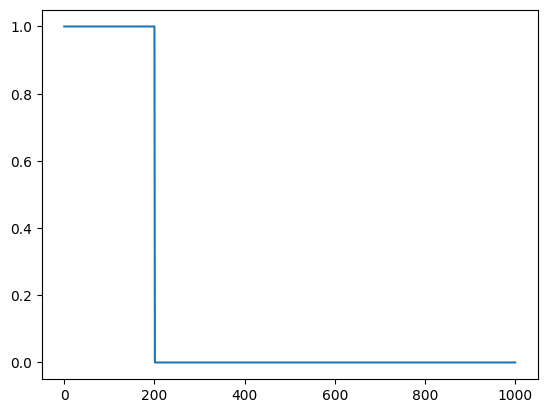

In [8]:
(t4['c_count[2]'] + t4['c_count[1]'] == t2['c_count[1]']).value_counts()
plt.plot(t4['c_count[2]'] + t4['c_count[1]'] == t2['c_count[1]'])

In [9]:
# plt.plot(t2.Step, t2.E_pair, label = '2-type system')
# plt.plot(t4.Step, t4.E_pair, label = '4-type system')
# plt.legend()

Clearly, they aren't exactly the same... but I argue that they are _spiritually_ the same.

Turning everything off and on one-by-one, I find that the difference appears when I add the `fix bond/react` command (without invoking `fix mol/swap`). These are run using the same, unmodified version of LAMMPS. 

# Turning off `fix mol/swap`:

In [10]:
t2 = pd.read_csv("FBR_test/2_types/n8k.dat", delim_whitespace=True, names = names_2, comment = '#')

In [11]:
t4 = pd.read_csv("FBR_test/4_types/n8k.dat", delim_whitespace=True, names = names_4, comment = '#')

Text(0.5, 1.0, 'Difference in bonds')

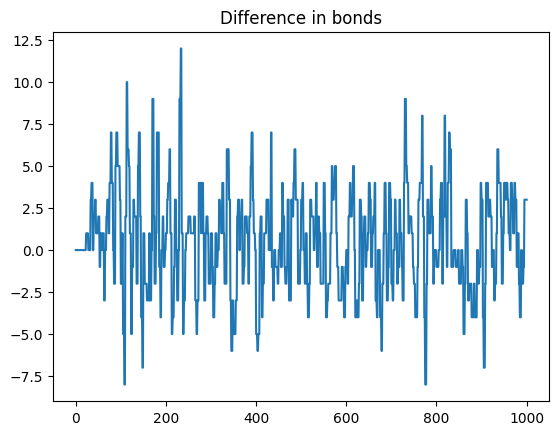

In [12]:
plt.plot((t4['c_btypes[3]'] - t2['c_btypes[3]']) * 8000)
plt.title("Difference in bonds")

So I think the addition of `fix bond/react` is enough to change the dynamics, but it's a trivial change. 

To demonstrate, let's look at other thermodynamic quantities, say, bond energies:

In [16]:
t2.columns

Index(['Step', 'KinEng', 'PotEng', 'TotEng', 'E_pair', 'E_bond', 'Temp',
       'Press', 'Density', 'Lx', 'Volume', 'Bonds', 'c_count[1]', 'c_count[2]',
       'c_btypes[1]', 'c_btypes[2]', 'c_btypes[3]'],
      dtype='object')

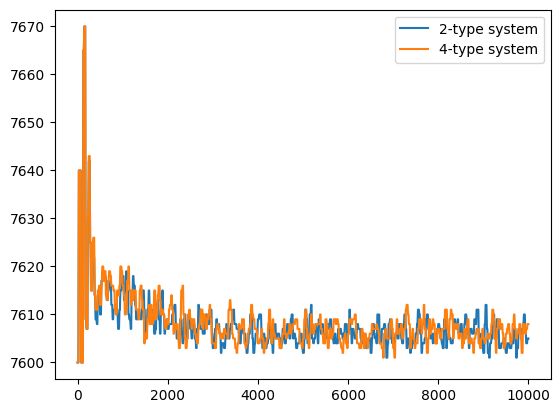

In [19]:
plt.plot(t2.Step, t2.Bonds, label = '2-type system')
plt.plot(t4.Step, t4.Bonds, label = '4-type system')
plt.legend()

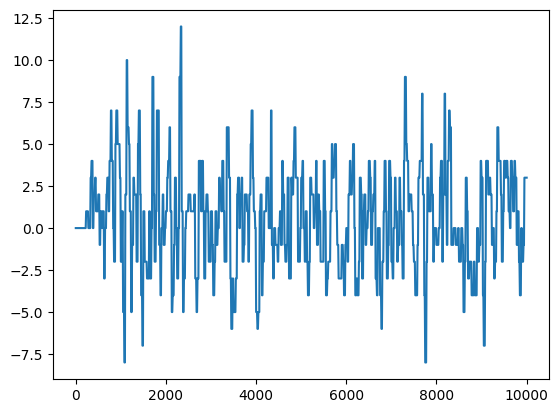

In [21]:
plt.plot(t2.Step, t4.Bonds - t2.Bonds)

In [ ]:
\